In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = pd.read_csv(r'D:\NLP_stock_market_price_prediction_using_LSTM-main\NLP_stock_market_price_prediction_using_LSTM-main\AAPL.csv')
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df = data["close"]
df

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

Text(0, 0.5, 'Stock price')

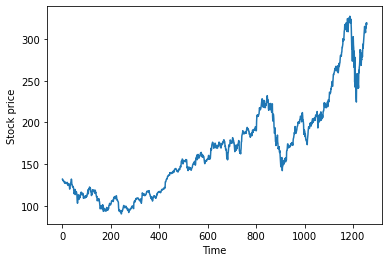

In [4]:
plt.plot(df)
plt.xlabel("Time")
plt.ylabel("Stock price")

## Data Transformation

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [6]:
df

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

## Split Data

In [22]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train,test=df[0:training_size,:],df[training_size:len(df),:1]

In [23]:
print(train.shape)
print(test.shape)

(817, 1)
(441, 1)


- Create dependent and independent features.
- Every 100 days value is dependent value , 101th value is independent value.
- By using LSTM model we are going to predict stock price.
- Our LSTM model will be learn 100 days closing price by that predict the next day closing price.

In [24]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]                ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [27]:
#LSTM requires extra one dimention
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
#Create model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0155 - val_loss: 0.0601
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 0.0010 - val_loss: 0.0069
Epoch 4/100
12/12 [==============================] - 0s 16ms/step - loss: 8.0956e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 6.7337e-04 - val_loss: 0.0040
Epoch 6/100
12/12 [==============================] - 0s 16ms/step - loss: 6.2122e-04 - val_loss: 0.0033
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 5.7675e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 0s 16ms/step - loss: 5.6213e-04 - val_loss: 0.0032
Epoch 9/100
12/12 [==============================] - 0s 15ms/step - loss: 5.4567e-04 - val_loss: 0.0032
Epoch 10/100
12/12 [==============================] - 0s 16ms/step - loss: 5

In [32]:
#Evaluation metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
#Transform the values to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
#train Prediction
from sklearn import metrics
print(f"Explained Variance Socre : {round(metrics.explained_variance_score(train_predict,y_train)*100,4)}")
print(f"Max Error                : {metrics.max_error(train_predict,y_train)}")
print(f"Root Mean Squared Error  : {round(np.sqrt(metrics.mean_squared_error(train_predict,y_train)),4)}")

Explained Variance Socre : 0.8528
Max Error                : 211.48846384138812
Root Mean Squared Error  : 141.4185


In [34]:
#test prediction
print(f"Explained Variance Socre : {round(metrics.explained_variance_score(test_predict,y_test)*100,4)}")
print(f"Max Error                : {metrics.max_error(test_predict,y_test)}")
print(f"Root Mean Squared Error  : {round(np.sqrt(metrics.mean_squared_error(test_predict,y_test)),4)}")

Explained Variance Socre : 0.8328
Max Error                : 324.17966965534674
Root Mean Squared Error  : 237.2576


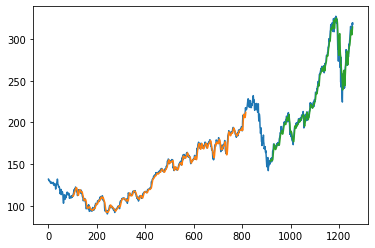

In [35]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
test.shape

(441, 1)

In [41]:
x_input=test[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

### Predicting market price for upcomming 50 days

In [44]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input :: {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output :: {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat[0].tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat[0].tolist())
        i=i+1
    

print(lst_output)

[0.9585869]
101
1 day input :: [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 

10 day output :: [[0.94872]]
11 day input :: [0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.940

19 day output :: [[0.9696753]]
20 day input :: [0.98594106 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841
 0.96972895 0.97614625 0.96795575 1.         0.99016297 0.99050072
 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915
 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.95858687 0.95738959 0.95394945 0.95018291
 0.94690937 0.944

29 day input :: [1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.95858687
 0.95738959 0.95394945 0.95018291 0.94690937 0.94454509 0.94330645
 0.94324291 0.9442634  0.94617337 0.94871998 0.951635   0.95467001
 0.95762259 0.96034992 0.96277386 0.96487492 0

36 day output :: [[0.9976396]]
37 day input :: [0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.95858687 0.95738959 0.95394945
 0.95018291 0.94690937 0.94454509 0.94330645 0.94324291 0.9442634
 0.94617337 0.94871998 0.951635   0.95467001 0.95762259 0.96034992
 0.96277386 0.96487492 0.9666819  0.968256   0.9696753  0.97102022
 0.97236216 0.973756

45 day output :: [[1.0116737]]
46 day input :: [0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.95858687 0.95738959 0.95394945 0.95018291 0.94690937 0.94454509
 0.94330645 0.94324291 0.9442634  0.94617337 0.94871998 0.951635
 0.95467001 0.95762259 0.96034992 0.96277386 0.96487492 0.9666819
 0.968256   0.9696753  0.97102022 0.97236216 0.97375613 0.97523648
 0.97681761 0.9784959  0.98025465 0.98206913 0.98391116 0.98575437
 0.98757631 0.9893

## Comparing old prediction & New prediction

In [66]:
list_output = np.array(lst_output).reshape(-1,1)

In [57]:
day_new=np.arange(1,101)
new_pre=np.arange(101,151)

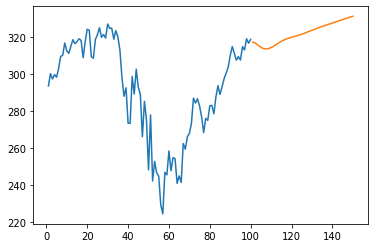

In [67]:
plt.plot(day_new,scaler.inverse_transform(df[1158:]))
plt.plot(new_pre,scaler.inverse_transform(list_output))

## New prediction

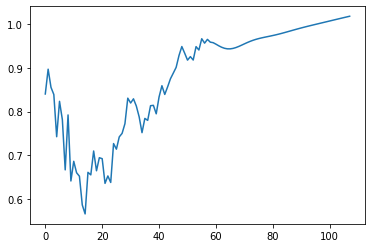

In [68]:
df2=df.tolist()
df2.extend(list_output)
plt.plot(df2[1200:])

## Original values

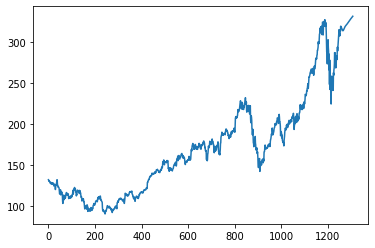

In [69]:
new_pre=scaler.inverse_transform(df2).tolist()
plt.plot(new_pre)